In [1]:
from pymongo import MongoClient

In [2]:
# create connection
client = MongoClient()
db = client['parking']
tickets = db['tickets']

In [3]:
tickets.find_one()

{'Agency': 1,
 'Body Style': 'PA',
 'Color': 'GY',
 'Fine amount': 50,
 'Issue Date': '2015-12-21T00:00:00',
 'Issue time': 1251,
 'Latitude': 99999,
 'Location': '13147 WELBY WAY',
 'Longitude': 99999,
 'Make': 'HOND',
 'Marked Time': '',
 'Meter Id': '',
 'Plate Expiry Date': 200304,
 'RP State Plate': 'CA',
 'Route': 1521,
 'Ticket number': 1103341116,
 'VIN': '',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Violation code': '4000A1',
 '_id': ObjectId('5cec5bf7a992c2eaf71e6e69')}

In [4]:
registration_tickets = tickets.find({'Violation Description': {'$eq': 'NO EVIDENCE OF REG'}}).limit(10)

In [5]:
type(registration_tickets)

pymongo.cursor.Cursor

In [6]:
registration_tickets[3]

{'Agency': 1,
 'Body Style': 'PA',
 'Color': 'BK',
 'Fine amount': 50,
 'Issue Date': '2015-12-22T00:00:00',
 'Issue time': 1110,
 'Latitude': 99999,
 'Location': '1200 W MIRAMAR',
 'Longitude': 99999,
 'Make': 'BMW',
 'Marked Time': '',
 'Meter Id': '',
 'Plate Expiry Date': 201511,
 'RP State Plate': 'CA',
 'Route': '2A75',
 'Ticket number': 1106506446,
 'VIN': '',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Violation code': '4000A1',
 '_id': ObjectId('5cec5bf7a992c2eaf71e6e75')}

In [7]:
registration_tickets = tickets.find({'Violation Description': {'$eq': 'NO EVIDENCE OF REG'}})

In [8]:
registration_tickets[0]

{'Agency': 1,
 'Body Style': 'PA',
 'Color': 'GY',
 'Fine amount': 50,
 'Issue Date': '2015-12-21T00:00:00',
 'Issue time': 1251,
 'Latitude': 99999,
 'Location': '13147 WELBY WAY',
 'Longitude': 99999,
 'Make': 'HOND',
 'Marked Time': '',
 'Meter Id': '',
 'Plate Expiry Date': 200304,
 'RP State Plate': 'CA',
 'Route': 1521,
 'Ticket number': 1103341116,
 'VIN': '',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Violation code': '4000A1',
 '_id': ObjectId('5cec5bf7a992c2eaf71e6e69')}

In [9]:
registration_tickets_makes = tickets.find({'Violation Description': {'$eq': 'NO EVIDENCE OF REG'}},
                                         {'Make': 1, '_id': 0})

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.io.json.json_normalize(registration_tickets_makes)

In [12]:
df['Make'].value_counts()

TOYO    18069
FORD    14661
HOND    14200
CHEV    12736
NISS     8860
DODG     5648
BMW      5388
VOLK     4159
MERZ     3149
JEEP     2637
HYUN     2393
GMC      2206
CHRY     2189
MAZD     2012
KIA      1999
LEXU     1914
ACUR     1903
AUDI     1752
MITS     1727
INFI     1678
CADI     1615
VOLV     1361
         1335
PONT     1249
MERC     1214
MBNZ     1142
BUIC     1090
LINC     1026
SUBA      801
LEXS      719
        ...  
SPEC        1
REL         1
LDR         1
WLDE        1
TAO         1
LNDC        1
TRAU        1
BLUE        1
ANDE        1
LYND        1
SEAR        1
PORH        1
CHLE        1
LXXS        1
TRBZ        1
LNQT        1
ALGE        1
YSTR        1
CNQT        1
VANN        1
BEUL        1
FLTS        1
CHIE        1
ULTR        1
WORL        1
AMG         1
ADVE        1
SNRS        1
REDB        1
LANR        1
Name: Make, Length: 1042, dtype: int64

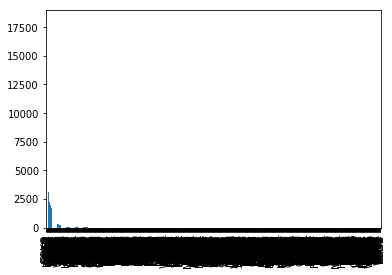

In [13]:
ax = df['Make'].value_counts().plot.bar()

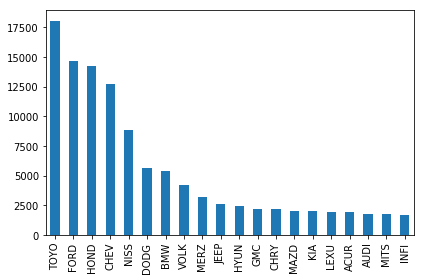

In [21]:
ax = df['Make'].value_counts()[:20].plot.bar()
plt.tight_layout()

In [22]:
fig = ax.get_figure()
fig.savefig('make_barplot.jpg')

Generate a bar plot of violations based on a car make.  Perhaps you first want to see which makes are most prominent, then look at the violations for a few of the most prominent makes.

In [16]:
# Ideally close connection when done, but not required
client.close()